In [209]:
import keras
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras import optimizers
from keras import losses
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras import regularizers
from keras.layers import BatchNormalization
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Nadam, Adam, SGD, RMSprop
from tensorflow.keras.models import Model


import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn import metrics
from sklearn import model_selection

import random
from sklearn.utils import shuffle

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
os.chdir("D:\\Maja\\LSDM\\Projekat\\train")
training_data1 = pd.read_csv('spectrum.csv')
training_data2 = pd.read_csv('scattering.csv')
training_data3 = pd.read_csv('lifetime.csv')

train_labels = pd.read_csv('train_labels.csv')

In [3]:
training_data1 = training_data1.set_index('ID')
training_data2 = training_data2.set_index('ID')
training_data3 = training_data3.set_index('ID')

In [39]:
sc = preprocessing.StandardScaler() 
training_data1_norm = pd.DataFrame(sc.fit_transform(training_data1))
training_data2_norm = pd.DataFrame(sc.fit_transform(training_data2))
training_data3_norm = pd.DataFrame(sc.fit_transform(training_data3))

In [66]:
os.chdir("D:\\Maja\\LSDM\\Projekat\\test")
test_data1 = pd.read_csv('tspectrum.csv')
test_data2 = pd.read_csv('tscattering.csv')
test_data3 = pd.read_csv('tlifetime.csv')

In [67]:
test_data1=test_data1.set_index('ID')
test_data2=test_data2.set_index('ID')
test_data3=test_data3.set_index('ID')

In [68]:
test_data1_norm = pd.DataFrame(sc.fit_transform(test_data1))
test_data2_norm = pd.DataFrame(sc.fit_transform(test_data2))
test_data3_norm = pd.DataFrame(sc.fit_transform(test_data3))

# Transform into images

(4, 32)


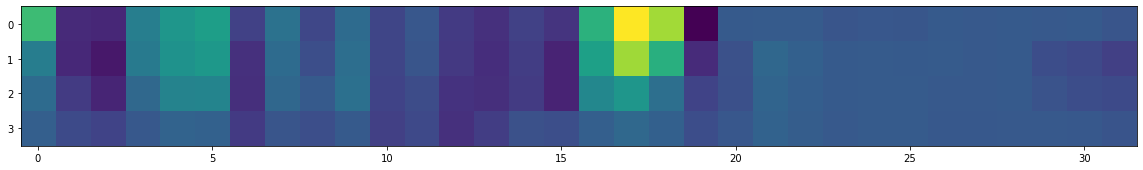

In [5]:
#spectrum
sample_one = np.array(training_data1_norm.iloc[0, :]).reshape(4,32)
print(sample_one.shape)

plt.figure(figsize=((20, 10)))
plt.imshow(sample_one)
plt.show()

In [6]:
training_data1_transformed = [np.array(training_data1_norm.iloc[i, :]).reshape(4,32) for i in range(training_data1_norm.shape[0])]

(20, 120)


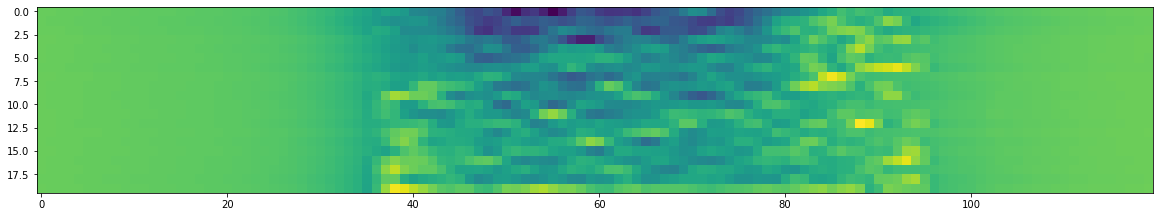

In [40]:
#scattering
sample_one = np.array(training_data2_norm.iloc[0, :]).reshape(20, 120)
print(sample_one.shape)

plt.figure(figsize=((20, 10)))
plt.imshow(sample_one)
plt.show()

In [41]:
training_data2_transformed = [np.array(training_data2_norm.iloc[i, :]).reshape(20, 120) for i in range(training_data2_norm.shape[0])]

(4, 24)


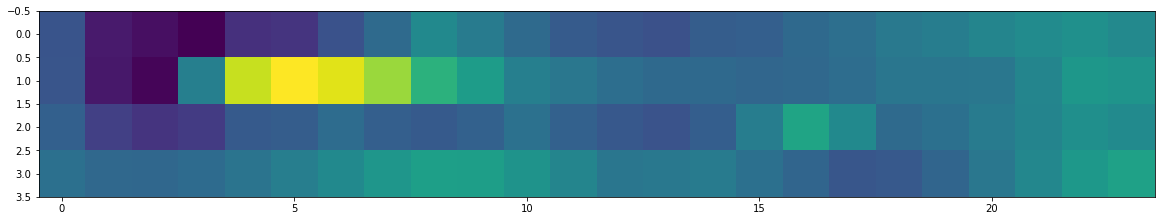

In [46]:
#lifetime
sample_one = np.array(training_data3_norm.iloc[0, :]).reshape(4,24)
print(sample_one.shape)

plt.figure(figsize=((20, 10)))
plt.imshow(sample_one)
plt.show()

In [47]:
training_data3_transformed = [np.array(training_data3_norm.iloc[i, :]).reshape(4, 24) for i in range(training_data3_norm.shape[0])]

In [69]:
test_data1_transformed = [np.array(test_data1_norm.iloc[i, :]).reshape(4,32) for i in range(test_data1_norm.shape[0])]

In [70]:
test_data1_trans = np.array(test_data1_transformed)

In [71]:
test_data2_transformed = [np.array(test_data2_norm.iloc[i, :]).reshape(20, 120) for i in range(test_data2_norm.shape[0])]

In [72]:
test_data2_trans = np.array(test_data2_transformed)

In [73]:
test_data3_transformed = [np.array(test_data3_norm.iloc[i, :]).reshape(4,24) for i in range(test_data3_norm.shape[0])]

In [74]:
test_data3_trans = np.array(test_data3_transformed)

# Shuffle data

In [7]:
indices1 = np.array(range(training_data1_norm.shape[0]))

random.seed(0)
random.shuffle(indices1)

new_data_1 = [training_data1_transformed[ind] for ind in indices1]
new_labels_1 = [train_labels['Pollen'][ind] for ind in indices1]

In [42]:
indices_2 = np.array(range(training_data2_norm.shape[0]))

random.seed(0)
random.shuffle(indices_2)

new_data_2 = [training_data2_transformed[ind] for ind in indices_2]
new_labels_2 = [train_labels['Pollen'][ind] for ind in indices_2]

In [48]:
indices_3 = np.array(range(training_data3_norm.shape[0]))

random.seed(0)
random.shuffle(indices_3)

new_data_3 = [training_data3_transformed[ind] for ind in indices_3]
new_labels_3 = [train_labels['Pollen'][ind] for ind in indices_3]

# Split data

In [8]:
ind1 = np.int(np.round(0.8 * len(training_data1_norm))) 

train_1 = new_data_1[:ind1] 
train_labels_1 = new_labels_1[:ind1]

val_1 = new_data_1[ind1:] 
val_labels_1 = new_labels_1[ind1:]

In [9]:
train_labels_1 = to_categorical(train_labels_1)
val_labels_1 = to_categorical(val_labels_1)

In [10]:
train_1 = np.array(train_1).astype('float32') 
train_labels_1=np.array(train_labels_1)
val_1 = np.array(val_1).astype('float32')
val_labels_1=np.array(val_labels_1)

In [43]:
ind2 = np.int(np.round(0.8 * len(training_data2_norm)))

train_2 = new_data_2[:ind2] 
train_labels_2 = new_labels_2[:ind2]

val_2 = new_data_2[ind2:] 
val_labels_2 = new_labels_2[ind2:]

In [44]:
train_labels_2 = to_categorical(train_labels_2)
val_labels_2 = to_categorical(val_labels_2)

In [45]:
train_2 = np.array(train_2).astype('float32') 
train_labels_2 = np.array(train_labels_2)
val_2 = np.array(val_2).astype('float32')
val_labels_2 = np.array(val_labels_2)

In [49]:
ind3 = np.int(np.round(0.8 * len(training_data3_norm)))

train_3 = new_data_3[:ind3] 
train_labels_3 = new_labels_3[:ind3]

val_3 = new_data_3[ind3:] 
val_labels_3 = new_labels_3[ind3:]

In [50]:
train_labels_3 = to_categorical(train_labels_3)
val_labels_3 = to_categorical(val_labels_3)

In [51]:
train_3 = np.array(train_3).astype('float32') 
train_labels_3 = np.array(train_labels_3)
val_3 = np.array(val_3).astype('float32')
val_labels_3 = np.array(val_labels_3)

# The first model for spectrum

In [82]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(4,32,1)))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(16, (1,1), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model1.add(layers.MaxPooling2D((1, 1)))

model1.add(layers.Conv2D(16, (1,1), activation='relu',kernel_regularizer=regularizers.l2(0.001)))

model1.add(layers.Flatten())

model1.add(layers.Dense(32, activation='relu'))

model1.add(layers.Dense(12, activation='softmax'))

In [83]:
model1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 2, 30, 32)         320       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 1, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 1, 15, 16)         528       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 1, 15, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 1, 15, 16)         272       
                                                                 
 flatten_15 (Flatten)        (None, 240)             

In [84]:
model1.compile(optimizer='adam',         
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
hist1 = model1.fit(train_1, train_labels_1,batch_size=400, epochs=20,validation_data = (val_1,val_labels_1))

Epoch 1/20
12/12 [==============================] - 2s 54ms/step - loss: 2.5214 - accuracy: 0.0838 - val_loss: 2.5074 - val_accuracy: 0.1167
Epoch 2/20
12/12 [==============================] - 0s 33ms/step - loss: 2.4858 - accuracy: 0.1481 - val_loss: 2.4741 - val_accuracy: 0.1592
Epoch 3/20
12/12 [==============================] - 0s 29ms/step - loss: 2.4328 - accuracy: 0.1844 - val_loss: 2.4020 - val_accuracy: 0.2000
Epoch 4/20
12/12 [==============================] - 0s 33ms/step - loss: 2.3389 - accuracy: 0.2229 - val_loss: 2.2960 - val_accuracy: 0.2233
Epoch 5/20
12/12 [==============================] - 1s 43ms/step - loss: 2.2210 - accuracy: 0.2417 - val_loss: 2.2000 - val_accuracy: 0.2533
Epoch 6/20
12/12 [==============================] - 1s 44ms/step - loss: 2.1323 - accuracy: 0.2654 - val_loss: 2.1496 - val_accuracy: 0.2758
Epoch 7/20
12/12 [==============================] - 0s 31ms/step - loss: 2.0727 - accuracy: 0.2967 - val_loss: 2.1018 - val_accuracy: 0.2850
Epoch 8/20
12

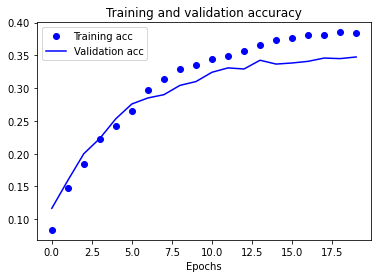

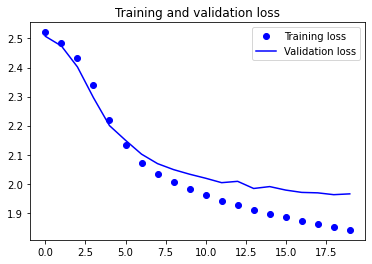

In [86]:
acc = hist1.history['accuracy']
val_acc = hist1.history['val_accuracy']
loss = hist1.history['loss']
val_loss = hist1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [88]:
y_pred1 = model1.predict(test_data1_trans)

121/121 [==============================] - 0s 3ms/step


In [76]:
ylist1 = np.empty(shape=len(y_pred1))
ylist1 = ylist1.astype(int)
ylist1

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
for i in range(len(y_pred1)):
    ylist1[i]=y_pred1[i].argmax()
ylist1

array([ 3, 10,  6, ...,  5,  8,  6])

In [90]:
os.chdir("D:\\Maja\\LSDM\\Projekat")
submission=pd.read_csv('submission.csv')
submission['Pollen']=ylist1
submission = submission.set_index('ID')

In [91]:
submission.head()

,Pollen
ID,
0,3
1,10
2,6
3,10
4,6


In [92]:
submission.to_csv('nn54.csv')

# Hyperparameter tuning - spectrum

In [93]:
def create_model1(neurons = 1):
    # define model
    model1 = models.Sequential()
    model1.add(layers.Conv2D(32, (3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(4,32,1)))
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Conv2D(neurons,(1,1), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model1.add(layers.MaxPooling2D((1, 1)))
    
    model1.add(layers.Conv2D(neurons,(1,1), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    
    model1.add(layers.Flatten())
    
    model1.add(layers.Dense(32, activation='relu')) 
    model1.add(layers.Dense(12, activation='softmax'))
    
    model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model1
model_1 = KerasClassifier(build_fn=create_model1, verbose=1)

In [94]:
parameters = {'neurons':[12, 14, 16, 32, 64, 128]} 
grid = GridSearchCV(estimator=model_1, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(train_1, train_labels_1)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 2s 8ms/step - loss: 2.2988 - accuracy: 0.2519
Best: 0.307917 using {'neurons': 128}


In [95]:
def create_model2(neurons = 1):
    # define model
    model1 = models.Sequential()
    model1.add(layers.Conv2D(32, (3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(4,32,1)))
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Conv2D(128,(1,1), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model1.add(layers.MaxPooling2D((1, 1)))
    
    model1.add(layers.Conv2D(128,(1,1), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    
    model1.add(layers.Flatten())
    
    model1.add(layers.Dense(neurons, activation='relu')) 
    model1.add(layers.Dense(12, activation='softmax'))
    
    model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model1
model_2 = KerasClassifier(build_fn=create_model2, verbose=1)

In [96]:
parameters = {'neurons':[12, 14, 16, 32, 64, 128]} 
grid = GridSearchCV(estimator=model_2, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(train_1, train_labels_1)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 3s 10ms/step - loss: 2.2235 - accuracy: 0.2919
Best: 0.325833 using {'neurons': 128}


In [97]:
def create_model3(init_mode='uniform', bias_mode = 'zeros'):
    # define model
    model1 = models.Sequential()
    model1.add(layers.Conv2D(32, (3,3),kernel_initializer=init_mode,bias_initializer= bias_mode,activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(4,32,1)))
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Conv2D(128,(1,1),kernel_initializer=init_mode,bias_initializer= bias_mode, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model1.add(layers.MaxPooling2D((1, 1)))
    
    model1.add(layers.Conv2D(128,(1,1),kernel_initializer=init_mode, bias_initializer= bias_mode,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    
    model1.add(layers.Flatten())
    
    model1.add(layers.Dense(128,kernel_initializer=init_mode,bias_initializer= bias_mode, activation='relu')) 
    model1.add(layers.Dense(12,kernel_initializer=init_mode,bias_initializer= bias_mode, activation='softmax'))
    
    model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model1
model_3 = KerasClassifier(build_fn=create_model3, verbose=1)

In [98]:
parameters = {'init_mode':['uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'],
             'bias_mode': ['uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']} 
grid = GridSearchCV(estimator=model_3, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(train_1, train_labels_1)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 3s 11ms/step - loss: 2.8100 - accuracy: 0.2642
Best: 0.338333 using {'bias_mode': 'glorot_normal', 'init_mode': 'he_normal'}


In [99]:
def create_model4(padding = 'valid'):
    # define model
    model1 = models.Sequential()
    model1.add(layers.Conv2D(32, (3,3),padding = padding, kernel_initializer='he_normal',bias_initializer= 'glorot_normal',activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(4,32,1)))
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Conv2D(128,(1,1),padding = padding, kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model1.add(layers.MaxPooling2D((1, 1)))
    
    model1.add(layers.Conv2D(128,(1,1),padding = padding, kernel_initializer='he_normal', bias_initializer= 'glorot_normal',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    
    model1.add(layers.Flatten())
    
    model1.add(layers.Dense(128,kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='relu')) 
    model1.add(layers.Dense(12,kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='softmax'))
    
    model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model1
model_4 = KerasClassifier(build_fn=create_model4, verbose=1)

In [100]:
parameters = {'padding':['valid', 'same', 'full', 'zero']} 
grid = GridSearchCV(estimator=model_4, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(train_1, train_labels_1)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 5s 21ms/step - loss: 2.7368 - accuracy: 0.2788
Best: 0.322083 using {'padding': 'same'}


In [101]:
def create_model5(l2=0.001):
    # define model
    model1 = models.Sequential()
    model1.add(layers.Conv2D(32, (3,3),padding = 'same', kernel_initializer='he_normal',bias_initializer= 'glorot_normal',activation='relu',kernel_regularizer=regularizers.l2(l2), input_shape=(4,32,1)))
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Conv2D(128,(1,1),padding = 'same', kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='relu',kernel_regularizer=regularizers.l2(l2)))
    model1.add(layers.MaxPooling2D((1, 1)))
    
    model1.add(layers.Conv2D(128,(1,1),padding = 'same', kernel_initializer='he_normal', bias_initializer= 'glorot_normal',activation='relu',kernel_regularizer=regularizers.l2(l2)))
    
    model1.add(layers.Flatten())
    
    model1.add(layers.Dense(128,kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='relu')) 
    model1.add(layers.Dense(12,kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='softmax'))
    
    model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model1
model_5 = KerasClassifier(build_fn=create_model5, verbose=1)

In [102]:
parameters = {'l2':[0.001,0.01, 0.1, 0.2, 0.3]} 
grid = GridSearchCV(estimator=model_5, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(train_1, train_labels_1)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 4s 20ms/step - loss: 2.8254 - accuracy: 0.2644
Best: 0.327083 using {'l2': 0.001}


In [103]:
def create_model6(learning_rate=0.01):
    # define model
    model1 = models.Sequential()
    model1.add(layers.Conv2D(32, (3,3),padding = 'same', kernel_initializer='he_normal',bias_initializer= 'glorot_normal',activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(4,32,1)))
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Conv2D(128,(1,1),padding = 'same', kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model1.add(layers.MaxPooling2D((1, 1)))
    
    model1.add(layers.Conv2D(128,(1,1),padding = 'same', kernel_initializer='he_normal', bias_initializer= 'glorot_normal',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    
    model1.add(layers.Flatten())
    
    model1.add(layers.Dense(128,kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='relu')) 
    model1.add(layers.Dense(12,kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='softmax'))
    
    optimizer = Adam(lr=learning_rate)
    
    model1.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
    return model1
model_6 = KerasClassifier(build_fn=create_model6, verbose=1)

In [104]:
parameters = {'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3]} 
grid = GridSearchCV(estimator=model_6, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(train_1, train_labels_1)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 4s 20ms/step - loss: 2.7228 - accuracy: 0.2790
Best: 0.336667 using {'learning_rate': 0.001}


In [105]:
def create_model7():
    # define model
    model1 = models.Sequential()
    model1.add(layers.Conv2D(32, (3,3),padding = 'same', kernel_initializer='he_normal',bias_initializer= 'glorot_normal',activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(4,32,1)))
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Conv2D(128,(1,1),padding = 'same', kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model1.add(layers.MaxPooling2D((1, 1)))
    
    model1.add(layers.Conv2D(128,(1,1),padding = 'same', kernel_initializer='he_normal', bias_initializer= 'glorot_normal',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    
    model1.add(layers.Flatten())
    
    model1.add(layers.Dense(128,kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='relu')) 
    model1.add(layers.Dense(12,kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='softmax'))
    
    model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model1
model_7 = KerasClassifier(build_fn=create_model7, verbose=1)

In [106]:
parameters = {'batch_size':[150, 200, 300, 400], 
              'epochs':[10, 20, 30, 40]}
grid = GridSearchCV(estimator=model_7, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(train_1, train_labels_1)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/10
12/12 [==============================] - 3s 124ms/step - loss: 4.1618 - accuracy: 0.1562
Epoch 2/10
12/12 [==============================] - 2s 125ms/step - loss: 2.8110 - accuracy: 0.2281
Epoch 3/10
12/12 [==============================] - 1s 120ms/step - loss: 2.5722 - accuracy: 0.3221
Epoch 4/10
12/12 [==============================] - 2s 124ms/step - loss: 2.4205 - accuracy: 0.3694
Epoch 5/10
12/12 [==============================] - 1s 121ms/step - loss: 2.3191 - accuracy: 0.3963
Epoch 6/10
12/12 [==============================] - 1s 120ms/step - loss: 2.2377 - accuracy: 0.4206
Epoch 7/10
12/12 [==============================] - 1s 123ms/step - loss: 2.1626 - accuracy: 0.4471
Epoch 8/10
12/12 [==============================] - 1s 122ms/step - loss: 2.1108 - accuracy: 0.4596
Epoch 9/10
12/12 [==============================] - 1s 121ms/step - loss: 2.0425 - accuracy: 0.4844
Epoch 10/10
12/12 [==============================] - 1s 119ms/step - loss: 1.9935 - accuracy: 0.4960

# Spectrum model after hyperparameter tuning

In [107]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3,3),padding = 'same', kernel_initializer='he_normal',bias_initializer= 'glorot_normal',activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(4,32,1)))
model1.add(layers.MaxPooling2D((2, 2)))
    
model1.add(layers.Conv2D(128,(1,1),padding = 'same', kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model1.add(layers.MaxPooling2D((1, 1)))
    
model1.add(layers.Conv2D(128,(1,1),padding = 'same', kernel_initializer='he_normal', bias_initializer= 'glorot_normal',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    
model1.add(layers.Flatten())
    
model1.add(layers.Dense(128,kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='relu')) 
model1.add(layers.Dense(12,kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='softmax'))
    
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [116]:
model1.fit(train_1, train_labels_1,batch_size=400, epochs=10)

Epoch 1/10
12/12 [==============================] - 2s 133ms/step - loss: 1.9625 - accuracy: 0.5048
Epoch 2/10
12/12 [==============================] - 2s 154ms/step - loss: 1.9221 - accuracy: 0.5133
Epoch 3/10
12/12 [==============================] - 2s 137ms/step - loss: 1.8903 - accuracy: 0.5271
Epoch 4/10
12/12 [==============================] - 2s 138ms/step - loss: 1.8547 - accuracy: 0.5396
Epoch 5/10
12/12 [==============================] - 2s 150ms/step - loss: 1.8195 - accuracy: 0.5527
Epoch 6/10
12/12 [==============================] - 2s 146ms/step - loss: 1.7845 - accuracy: 0.5600
Epoch 7/10
12/12 [==============================] - 2s 135ms/step - loss: 1.7603 - accuracy: 0.5702
Epoch 8/10
12/12 [==============================] - 2s 139ms/step - loss: 1.7318 - accuracy: 0.5783
Epoch 9/10
12/12 [==============================] - 2s 135ms/step - loss: 1.6961 - accuracy: 0.5869
Epoch 10/10
12/12 [==============================] - 2s 136ms/step - loss: 1.6501 - accuracy: 0.6121

In [122]:
results_1 = model1.evaluate(val_1,val_labels_1)

38/38 [==============================] - 1s 7ms/step - loss: 2.6039 - accuracy: 0.3725


In [117]:
y_pred1 = model1.predict(test_data1_trans)

121/121 [==============================] - 1s 6ms/step


# The first model for scattering

In [118]:
model2 = models.Sequential()

model2.add(layers.Conv2D(64, (3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(20,120,1)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64,(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dropout(0.2))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64,(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dropout(0.2))

model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu')) 
model2.add(Dropout(0.2))
model2.add(layers.Dense(12, activation='softmax'))

In [119]:
model2.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 18, 118, 64)       640       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 9, 59, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 7, 57, 64)         36928     
                                                                 
 dropout_13 (Dropout)        (None, 7, 57, 64)         0         
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 3, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_74 (Conv2D)          (None, 1, 26, 64)       

In [120]:
model2.compile(optimizer='adam',       
              loss='categorical_crossentropy',   
              metrics=['accuracy'])

In [121]:
hist2 = model2.fit(train_2, train_labels_2, batch_size=400, epochs=20, validation_data = (val_2,val_labels_2))

Epoch 1/20
12/12 [==============================] - 31s 2s/step - loss: 2.5116 - accuracy: 0.1525 - val_loss: 2.4220 - val_accuracy: 0.1983
Epoch 2/20
12/12 [==============================] - 27s 2s/step - loss: 2.3846 - accuracy: 0.2140 - val_loss: 2.3104 - val_accuracy: 0.2367
Epoch 3/20
12/12 [==============================] - 28s 2s/step - loss: 2.2987 - accuracy: 0.2419 - val_loss: 2.2326 - val_accuracy: 0.2742
Epoch 4/20
12/12 [==============================] - 24s 2s/step - loss: 2.2217 - accuracy: 0.2627 - val_loss: 2.1864 - val_accuracy: 0.3017
Epoch 5/20
12/12 [==============================] - 24s 2s/step - loss: 2.1377 - accuracy: 0.3096 - val_loss: 2.0887 - val_accuracy: 0.3308
Epoch 6/20
12/12 [==============================] - 24s 2s/step - loss: 2.0520 - accuracy: 0.3233 - val_loss: 2.0381 - val_accuracy: 0.3492
Epoch 7/20
12/12 [==============================] - 24s 2s/step - loss: 1.9891 - accuracy: 0.3469 - val_loss: 1.9789 - val_accuracy: 0.3775
Epoch 8/20
12/12 [==

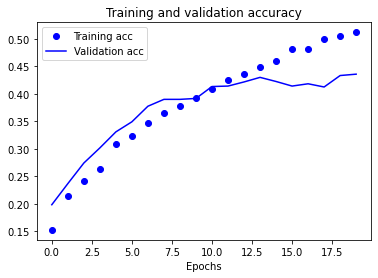

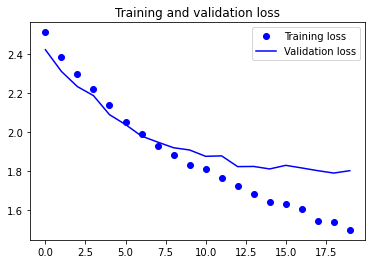

In [123]:
acc = hist2.history['accuracy']
val_acc = hist2.history['val_accuracy']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [124]:
y_pred2 = model2.predict(test_data2_trans)

121/121 [==============================] - 6s 47ms/step


In [125]:
ylist=np.empty(shape=len(y_pred2))
ylist=ylist.astype(int)
ylist

array([0, 0, 0, ..., 0, 0, 0])

In [126]:
for i in range(len(y_pred2)):
    ylist[i]=y_pred2[i].argmax()
ylist

array([5, 9, 6, ..., 7, 9, 3])

In [127]:
os.chdir("D:\\Maja\\LSDM\\Projekat")
submission=pd.read_csv('submission.csv')
submission['Pollen']=ylist
submission = submission.set_index('ID')

In [128]:
submission.head()

,Pollen
ID,
0,5
1,9
2,6
3,10
4,6


In [129]:
submission.to_csv('nn56.csv')

# Hyperparameter tuning - scattering

In [130]:
def create_models1(neurons = 1):
    # define model
    model2 = models.Sequential()
    model2.add(layers.Conv2D(64, (3,3),activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(20,120,1)))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(neurons,(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model2.add(Dropout(0.2))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(neurons,(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model2.add(Dropout(0.2))
    
    model2.add(layers.Flatten())
    
    model2.add(layers.Dense(128, activation='relu')) 
    model2.add(Dropout(0.2))
    
    model2.add(layers.Dense(12, activation='softmax'))
    
    model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model2
model_s1 = KerasClassifier(build_fn=create_models1, verbose=1)

In [131]:
parameters = {'neurons':[12, 16, 32, 64, 128]}
grid = GridSearchCV(estimator=model_s1, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(train_2, train_labels_2)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 28s 176ms/step - loss: 2.4166 - accuracy: 0.1838
Best: 0.234167 using {'neurons': 64}


In [132]:
def create_models1(neurons = 1):
    # define model
    model2 = models.Sequential()
    model2.add(layers.Conv2D(neurons, (3,3),activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(20,120,1)))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(64,(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model2.add(Dropout(0.2))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(64,(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model2.add(Dropout(0.2))
    
    model2.add(layers.Flatten())
    
    model2.add(layers.Dense(128, activation='relu')) 
    model2.add(Dropout(0.2))
    
    model2.add(layers.Dense(12, activation='softmax'))
    
    model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model2
model_s1 = KerasClassifier(build_fn=create_models1, verbose=1)

In [133]:
parameters = {'neurons':[12, 16, 32, 64, 128]}
grid = GridSearchCV(estimator=model_s1, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(train_2, train_labels_2)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 14s 83ms/step - loss: 2.3987 - accuracy: 0.1863
Best: 0.238958 using {'neurons': 12}


In [134]:
def create_models1(neurons = 1):
    # define model
    model2 = models.Sequential()
    model2.add(layers.Conv2D(12, (3,3),activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(20,120,1)))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(64,(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model2.add(Dropout(0.2))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(64,(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model2.add(Dropout(0.2))
    
    model2.add(layers.Flatten())
    
    model2.add(layers.Dense(neurons, activation='relu')) 
    model2.add(Dropout(0.2))
    
    model2.add(layers.Dense(12, activation='softmax'))
    
    model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model2
model_s1 = KerasClassifier(build_fn=create_models1, verbose=1)

In [135]:
parameters = {'neurons':[12, 16, 32, 64, 128]}
grid = GridSearchCV(estimator=model_s1, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(train_2, train_labels_2)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 19s 92ms/step - loss: 2.4211 - accuracy: 0.1604
Best: 0.230625 using {'neurons': 64}


In [136]:
def create_models2(init_mode='uniform', bias_mode = 'zeros'):
    # define model
    model2 = models.Sequential()
    model2.add(layers.Conv2D(12, (3,3),kernel_initializer=init_mode,bias_initializer= bias_mode, activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(20,120,1)))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(64,(3,3),kernel_initializer=init_mode,bias_initializer= bias_mode, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model2.add(Dropout(0.2))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(64,(3,3), kernel_initializer=init_mode,bias_initializer= bias_mode, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model2.add(Dropout(0.2))
    
    model2.add(layers.Flatten())
    
    model2.add(layers.Dense(64,kernel_initializer=init_mode,bias_initializer= bias_mode, activation='relu')) 
    model2.add(Dropout(0.2))
    
    model2.add(layers.Dense(12, kernel_initializer=init_mode,bias_initializer= bias_mode, activation='softmax'))
    
    model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model2
model_s2 = KerasClassifier(build_fn=create_models2, verbose=1)

In [137]:
parameters = {'init_mode':['uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'],
             'bias_mode': ['uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']} 
grid = GridSearchCV(estimator=model_s2, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(train_2, train_labels_2)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 11s 68ms/step - loss: 2.4277 - accuracy: 0.1585
Best: 0.233125 using {'bias_mode': 'uniform', 'init_mode': 'glorot_normal'}


In [138]:
def create_models3(padding = 'valid'):
    # define model
    model2 = models.Sequential()
    model2.add(layers.Conv2D(12, (3,3), padding = padding, kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(20,120,1)))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(64,(3,3), padding = padding, kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model2.add(Dropout(0.2))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(64,(3,3), padding = padding, kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model2.add(Dropout(0.2))
    
    model2.add(layers.Flatten())
    
    model2.add(layers.Dense(64,kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu')) 
    model2.add(Dropout(0.2))
    
    model2.add(layers.Dense(12, kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='softmax'))
    
    model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model2
model_s3 = KerasClassifier(build_fn=create_models3, verbose=1)

In [139]:
parameters = {'padding':['valid', 'same', 'full', 'zero']} 
grid = GridSearchCV(estimator=model_s3, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(train_2, train_labels_2)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 20s 125ms/step - loss: 2.3937 - accuracy: 0.1879
Best: 0.224375 using {'padding': 'same'}


In [140]:
def create_models4(l2 = 0.001):
    # define model
    model2 = models.Sequential()
    model2.add(layers.Conv2D(12, (3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(l2), input_shape=(20,120,1)))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(64,(3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(l2)))
    model2.add(Dropout(0.2))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(64,(3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(l2)))
    model2.add(Dropout(0.2))
    
    model2.add(layers.Flatten())
    
    model2.add(layers.Dense(64,kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu')) 
    model2.add(Dropout(0.2))
    
    model2.add(layers.Dense(12, kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='softmax'))
    
    model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model2
model_s4 = KerasClassifier(build_fn=create_models4, verbose=1)

In [142]:
parameters = {'l2':[0.001,0.01, 0.1, 0.2, 0.3]} 
grid = GridSearchCV(estimator=model_s4, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(train_2, train_labels_2)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 19s 120ms/step - loss: 2.3880 - accuracy: 0.1835
Best: 0.235000 using {'l2': 0.001}


In [143]:
def create_models5(learning_rate = 0.01):
    # define model
    model2 = models.Sequential()
    model2.add(layers.Conv2D(12, (3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(20,120,1)))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(64,(3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model2.add(Dropout(0.2))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(64,(3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model2.add(Dropout(0.2))
    
    model2.add(layers.Flatten())
    
    model2.add(layers.Dense(64,kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu')) 
    model2.add(Dropout(0.2))
    
    model2.add(layers.Dense(12, kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='softmax'))
    
    optimizer = Adam(lr=learning_rate)
    
    model2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
    return model2
model_s5 = KerasClassifier(build_fn=create_models5, verbose=1)

In [144]:
parameters = {'learning_rate':[0.001,0.01, 0.1, 0.2, 0.3]} 
grid = GridSearchCV(estimator=model_s5, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(train_2, train_labels_2)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 18s 113ms/step - loss: 2.3735 - accuracy: 0.1787
Best: 0.233333 using {'learning_rate': 0.001}


In [145]:
def create_models6(dropout_rate = 0.0):
    # define model
    model2 = models.Sequential()
    model2.add(layers.Conv2D(12, (3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(20,120,1)))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(64,(3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model2.add(Dropout(dropout_rate))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(64,(3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model2.add(Dropout(dropout_rate))
    
    model2.add(layers.Flatten())
    
    model2.add(layers.Dense(64,kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu')) 
    model2.add(Dropout(dropout_rate))
    
    model2.add(layers.Dense(12, kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='softmax'))
    
    model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model2
model_s6 = KerasClassifier(build_fn=create_models6, verbose=1)

In [146]:
parameters = {'dropout_rate':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
grid = GridSearchCV(estimator=model_s6, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(train_2, train_labels_2)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 28s 160ms/step - loss: 2.3803 - accuracy: 0.1835
Best: 0.229375 using {'dropout_rate': 0.1}


In [147]:
def create_models7():
    # define model
    model2 = models.Sequential()
    model2.add(layers.Conv2D(12, (3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(20,120,1)))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(64,(3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model2.add(Dropout(0.1))
    model2.add(layers.MaxPooling2D((2, 2)))
    
    model2.add(layers.Conv2D(64,(3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model2.add(Dropout(0.1))
    
    model2.add(layers.Flatten())
    
    model2.add(layers.Dense(64,kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu')) 
    model2.add(Dropout(0.1))
    
    model2.add(layers.Dense(12, kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='softmax'))
    
    model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model2
model_s7 = KerasClassifier(build_fn=create_models7, verbose=1)

In [148]:
#nije stigao da mi očita pa sam Interruptovala 

parameters = {'batch_size':[150, 200, 300, 400], 
              'epochs':[10, 20, 30, 40]}
grid = GridSearchCV(estimator=model_s7, param_grid=parameters, n_jobs=-1, cv=3)
grid_result = grid.fit(train_2, train_labels_2)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

KeyboardInterrupt: 

# Scattering model after hyperparameter tuning

In [149]:
model2 = models.Sequential()
model2.add(layers.Conv2D(12, (3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(20,120,1)))
model2.add(layers.MaxPooling2D((2, 2)))
    
model2.add(layers.Conv2D(64,(3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dropout(0.1))
model2.add(layers.MaxPooling2D((2, 2)))
    
model2.add(layers.Conv2D(64,(3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dropout(0.1))
    
model2.add(layers.Flatten())
    
model2.add(layers.Dense(64,kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu')) 
model2.add(Dropout(0.1))
    
model2.add(layers.Dense(12, kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='softmax'))
    
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [150]:
model2.fit(train_2, train_labels_2,batch_size=400, epochs=15)

Epoch 1/15
12/12 [==============================] - 16s 1s/step - loss: 2.4712 - accuracy: 0.1431
Epoch 2/15
12/12 [==============================] - 14s 1s/step - loss: 2.3230 - accuracy: 0.2123
Epoch 3/15
12/12 [==============================] - 14s 1s/step - loss: 2.2203 - accuracy: 0.2581
Epoch 4/15
12/12 [==============================] - 16s 1s/step - loss: 2.1223 - accuracy: 0.3002
Epoch 5/15
12/12 [==============================] - 15s 1s/step - loss: 2.0382 - accuracy: 0.3250
Epoch 6/15
12/12 [==============================] - 14s 1s/step - loss: 1.9615 - accuracy: 0.3542
Epoch 7/15
12/12 [==============================] - 14s 1s/step - loss: 1.8863 - accuracy: 0.3879
Epoch 8/15
12/12 [==============================] - 14s 1s/step - loss: 1.8262 - accuracy: 0.4017
Epoch 9/15
12/12 [==============================] - 16s 1s/step - loss: 1.7818 - accuracy: 0.4171
Epoch 10/15
12/12 [==============================] - 14s 1s/step - loss: 1.6954 - accuracy: 0.4471
Epoch 11/15
12/12 [

In [151]:
results_2 = model2.evaluate(val_2,val_labels_2)

38/38 [==============================] - 1s 28ms/step - loss: 1.8314 - accuracy: 0.4375


In [152]:
y_pred2 = model2.predict(test_data2_trans)

121/121 [==============================] - 4s 30ms/step


# The first model for lifetime

In [156]:
model3 = models.Sequential()

model3.add(layers.Conv2D(32,(3,3), activation = 'relu', padding = "same", input_shape = (4,24,1)))
model3.add(layers.MaxPooling2D((1, 1)))

model3.add(layers.Conv2D(64,(3,3), activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))

model3.add(layers.Flatten())
model3.add(layers.Dense(12, activation='relu'))

model3.add(layers.Dense(12, activation='softmax'))

In [157]:
model3.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 4, 24, 32)         320       
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 4, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_103 (Conv2D)         (None, 2, 22, 64)         18496     
                                                                 
 flatten_34 (Flatten)        (None, 2816)              0         
                                                                 
 dense_68 (Dense)            (None, 12)                33804     
                                                                 
 dense_69 (Dense)            (None, 12)                156       
                                                     

In [158]:
model3.compile(optimizer='adam',          
              loss='categorical_crossentropy',   
              metrics=['accuracy'])

In [159]:
hist3 = model3.fit(train_3, train_labels_3, batch_size=400, epochs=20, validation_data = (val_3,val_labels_3))

Epoch 1/20
12/12 [==============================] - 2s 116ms/step - loss: 2.8021 - accuracy: 0.1635 - val_loss: 2.6551 - val_accuracy: 0.2158
Epoch 2/20
12/12 [==============================] - 1s 90ms/step - loss: 2.5785 - accuracy: 0.2248 - val_loss: 2.4465 - val_accuracy: 0.2400
Epoch 3/20
12/12 [==============================] - 1s 91ms/step - loss: 2.4153 - accuracy: 0.2617 - val_loss: 2.3169 - val_accuracy: 0.2842
Epoch 4/20
12/12 [==============================] - 1s 91ms/step - loss: 2.2988 - accuracy: 0.2927 - val_loss: 2.2350 - val_accuracy: 0.3067
Epoch 5/20
12/12 [==============================] - 1s 90ms/step - loss: 2.2260 - accuracy: 0.2962 - val_loss: 2.1739 - val_accuracy: 0.3058
Epoch 6/20
12/12 [==============================] - 1s 93ms/step - loss: 2.1696 - accuracy: 0.3073 - val_loss: 2.1446 - val_accuracy: 0.3167
Epoch 7/20
12/12 [==============================] - 1s 96ms/step - loss: 2.1254 - accuracy: 0.3198 - val_loss: 2.1026 - val_accuracy: 0.3175
Epoch 8/20
1

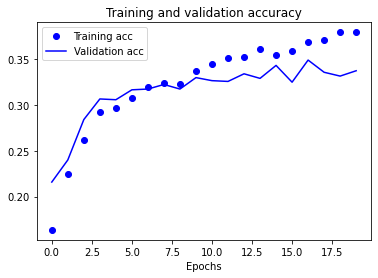

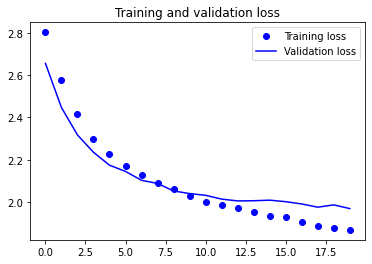

In [160]:
acc = hist3.history['accuracy']
val_acc = hist3.history['val_accuracy']
loss = hist3.history['loss']
val_loss = hist3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [161]:
y_pred3 = model3.predict(test_data3_trans)

121/121 [==============================] - 1s 5ms/step


In [162]:
ylist3=np.empty(shape=len(y_pred3))
ylist3=ylist3.astype(int)
ylist3

array([0, 0, 0, ..., 0, 0, 0])

In [163]:
for i in range(len(y_pred3)):
    ylist3[i]=y_pred3[i].argmax()

In [164]:
ylist3

array([8, 9, 0, ..., 8, 3, 8])

In [165]:
os.chdir("D:\\Maja\\LSDM\\Projekat")
submission=pd.read_csv('submission.csv')
submission['Pollen']=ylist3
submission = submission.set_index('ID')

In [166]:
submission.to_csv('nn58.csv')

# Hyperparameter tuning - lifetime

In [172]:
def create_modellt1(neurons = 1):
    
    model3 = models.Sequential()
    model3.add(layers.Conv2D(32,(3,3), activation = 'relu', padding = "same", input_shape = (4,24,1)))
    model3.add(layers.MaxPooling2D((1, 1)))
    
    model3.add(layers.Conv2D(neurons,(3,3), activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
    
    model3.add(layers.Flatten())
    
    model3.add(layers.Dense(12, activation='relu'))
    model3.add(layers.Dense(12, activation='softmax'))
    
    model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model3
model_lt1 = KerasClassifier(build_fn=create_modellt1, verbose=1)

In [174]:
parameters = {'neurons':[12, 14, 16, 32, 64, 128]} 
grid = GridSearchCV(estimator=model_lt1, param_grid=parameters,n_jobs=-1, cv=5)
grid_result = grid.fit(train_3, train_labels_3)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 5s 12ms/step - loss: 2.5056 - accuracy: 0.1846
Best: 0.252708 using {'neurons': 32}


In [176]:
def create_modellt1(neurons = 1):
    
    model3 = models.Sequential()
    model3.add(layers.Conv2D(32,(3,3), activation = 'relu', padding = "same", input_shape = (4,24,1)))
    model3.add(layers.MaxPooling2D((1, 1)))
    
    model3.add(layers.Conv2D(32,(3,3), activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
    
    model3.add(layers.Flatten())
    
    model3.add(layers.Dense(neurons, activation='relu'))
    model3.add(layers.Dense(12, activation='softmax'))
    
    model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model3
model_lt1 = KerasClassifier(build_fn=create_modellt1, verbose=1)

In [177]:
parameters = {'neurons':[12, 14, 16, 32, 64, 128]} 
grid = GridSearchCV(estimator=model_lt1, param_grid=parameters,n_jobs=-1, cv=5)
grid_result = grid.fit(train_3, train_labels_3)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 3s 13ms/step - loss: 2.3646 - accuracy: 0.2650
Best: 0.303542 using {'neurons': 128}


In [178]:
def create_modellt1(neurons = 1):
    
    model3 = models.Sequential()
    model3.add(layers.Conv2D(neurons,(3,3), activation = 'relu', padding = "same", input_shape = (4,24,1)))
    model3.add(layers.MaxPooling2D((1, 1)))
    
    model3.add(layers.Conv2D(32,(3,3), activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
    
    model3.add(layers.Flatten())
    
    model3.add(layers.Dense(128, activation='relu'))
    model3.add(layers.Dense(12, activation='softmax'))
    
    model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model3
model_lt1 = KerasClassifier(build_fn=create_modellt1, verbose=1)

In [179]:
parameters = {'neurons':[12, 14, 16, 32, 64, 128]} 
grid = GridSearchCV(estimator=model_lt1, param_grid=parameters,n_jobs=-1, cv=5)
grid_result = grid.fit(train_3, train_labels_3)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 6s 35ms/step - loss: 2.3503 - accuracy: 0.2721
Best: 0.314583 using {'neurons': 128}


In [180]:
def create_modellt2(init_mode='uniform', bias_mode = 'zeros'):
    
    model3 = models.Sequential()
    model3.add(layers.Conv2D(128,(3,3),kernel_initializer=init_mode,bias_initializer= bias_mode, activation = 'relu', padding = "same", input_shape = (4,24,1)))
    model3.add(layers.MaxPooling2D((1, 1)))
    
    model3.add(layers.Conv2D(32,(3,3),kernel_initializer=init_mode,bias_initializer= bias_mode, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
    
    model3.add(layers.Flatten())
    
    model3.add(layers.Dense(128,kernel_initializer=init_mode,bias_initializer= bias_mode, activation='relu'))
    model3.add(layers.Dense(12,kernel_initializer=init_mode,bias_initializer= bias_mode, activation='softmax'))
    
    model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model3
model_lt2 = KerasClassifier(build_fn=create_modellt2, verbose=1)

In [181]:
parameters = {'init_mode':['uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'],
             'bias_mode': ['uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']} 
grid = GridSearchCV(estimator=model_lt2, param_grid=parameters,n_jobs=-1, cv=5)
grid_result = grid.fit(train_3, train_labels_3)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 6s 31ms/step - loss: 2.6628 - accuracy: 0.2612
Best: 0.319583 using {'bias_mode': 'he_uniform', 'init_mode': 'he_uniform'}


In [182]:
def create_modellt3(padding = 'valid'):
    
    model3 = models.Sequential()
    model3.add(layers.Conv2D(128,(3,3),padding = padding, kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation = 'relu', input_shape = (4,24,1)))
    model3.add(layers.MaxPooling2D((1, 1)))
    
    model3.add(layers.Conv2D(32,(3,3),padding = padding, kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
    
    model3.add(layers.Flatten())
    
    model3.add(layers.Dense(128,kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation='relu'))
    model3.add(layers.Dense(12,kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation='softmax'))
    
    model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model3
model_lt3 = KerasClassifier(build_fn=create_modellt3, verbose=1)

In [183]:
parameters = {'padding':['valid', 'same', 'full', 'zero']} 
grid = GridSearchCV(estimator=model_lt3, param_grid=parameters,n_jobs=-1, cv=5)
grid_result = grid.fit(train_3, train_labels_3)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 9s 53ms/step - loss: 2.6314 - accuracy: 0.2717
Best: 0.317083 using {'padding': 'same'}


In [184]:
def create_modellt4(l2 = 0.001):
    
    model3 = models.Sequential()
    model3.add(layers.Conv2D(128,(3,3),padding = 'same', kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation = 'relu', input_shape = (4,24,1)))
    model3.add(layers.MaxPooling2D((1, 1)))
    
    model3.add(layers.Conv2D(32,(3,3),padding = 'same', kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation = 'relu', kernel_regularizer=regularizers.l2(l2)))
    
    model3.add(layers.Flatten())
    
    model3.add(layers.Dense(128,kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation='relu'))
    model3.add(layers.Dense(12,kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation='softmax'))
    
    model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model3
model_lt4 = KerasClassifier(build_fn=create_modellt4, verbose=1)

In [185]:
parameters = {'l2':[0.001,0.01, 0.1, 0.2, 0.3]} 
grid = GridSearchCV(estimator=model_lt4, param_grid=parameters,n_jobs=-1, cv=5)
grid_result = grid.fit(train_3, train_labels_3)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 8s 50ms/step - loss: 2.7008 - accuracy: 0.2573
Best: 0.315208 using {'l2': 0.01}


In [187]:
def create_modellt5(learning_rate = 0.01):
    
    model3 = models.Sequential()
    model3.add(layers.Conv2D(128,(3,3),padding = 'same', kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation = 'relu', input_shape = (4,24,1)))
    model3.add(layers.MaxPooling2D((1, 1)))
    
    model3.add(layers.Conv2D(32,(3,3),padding = 'same', kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
    
    model3.add(layers.Flatten())
    
    model3.add(layers.Dense(128,kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation='relu'))
    model3.add(layers.Dense(12,kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation='softmax'))
    
    optimizer = Adam(lr=learning_rate)
    
    model3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
    return model3
model_lt5 = KerasClassifier(build_fn=create_modellt5, verbose=1)

In [188]:
parameters = {'learning_rate':[0.001,0.01, 0.1, 0.2, 0.3]} 
grid = GridSearchCV(estimator=model_lt5, param_grid=parameters,n_jobs=-1, cv=5)
grid_result = grid.fit(train_3, train_labels_3)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

150/150 [==============================] - 8s 46ms/step - loss: 2.6523 - accuracy: 0.2771
Best: 0.310625 using {'learning_rate': 0.001}


In [189]:
def create_modellt6():
    
    model3 = models.Sequential()
    model3.add(layers.Conv2D(128,(3,3),padding = 'same', kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation = 'relu', input_shape = (4,24,1)))
    model3.add(layers.MaxPooling2D((1, 1)))
    
    model3.add(layers.Conv2D(32,(3,3),padding = 'same', kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
    
    model3.add(layers.Flatten())
    
    model3.add(layers.Dense(128,kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation='relu'))
    model3.add(layers.Dense(12,kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation='softmax'))
    
    model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model3
model_lt6 = KerasClassifier(build_fn=create_modellt6, verbose=1)

In [190]:
parameters = {'batch_size':[150, 200, 300, 400], 
              'epochs':[10, 20, 30, 40]}
grid = GridSearchCV(estimator=model_lt6, param_grid=parameters,n_jobs=-1, cv=5)
grid_result = grid.fit(train_3, train_labels_3)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/10
12/12 [==============================] - 6s 421ms/step - loss: 3.1508 - accuracy: 0.1790
Epoch 2/10
12/12 [==============================] - 5s 406ms/step - loss: 2.6924 - accuracy: 0.2965
Epoch 3/10
12/12 [==============================] - 5s 404ms/step - loss: 2.4355 - accuracy: 0.3629
Epoch 4/10
12/12 [==============================] - 5s 413ms/step - loss: 2.2532 - accuracy: 0.3950
Epoch 5/10
12/12 [==============================] - 5s 409ms/step - loss: 2.1067 - accuracy: 0.4271
Epoch 6/10
12/12 [==============================] - 5s 416ms/step - loss: 1.9682 - accuracy: 0.4610
Epoch 7/10
12/12 [==============================] - 5s 425ms/step - loss: 1.8549 - accuracy: 0.4885
Epoch 8/10
12/12 [==============================] - 5s 414ms/step - loss: 1.7536 - accuracy: 0.5177
Epoch 9/10
12/12 [==============================] - 5s 423ms/step - loss: 1.6601 - accuracy: 0.5477
Epoch 10/10
12/12 [==============================] - 5s 415ms/step - loss: 1.5732 - accuracy: 0.5727

# Lifetime model after hyperparameter tuning

In [191]:
model3 = models.Sequential()
model3.add(layers.Conv2D(128,(3,3),padding = 'same', kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation = 'relu', input_shape = (4,24,1)))
model3.add(layers.MaxPooling2D((1, 1)))
    
model3.add(layers.Conv2D(32,(3,3),padding = 'same', kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
    
model3.add(layers.Flatten())
    
model3.add(layers.Dense(128,kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation='relu'))
model3.add(layers.Dense(12,kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation='softmax'))
    
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [194]:
model3.fit(train_3, train_labels_3,batch_size=400, epochs=10) 

Epoch 1/10
12/12 [==============================] - 5s 386ms/step - loss: 1.6758 - accuracy: 0.5387
Epoch 2/10
12/12 [==============================] - 5s 399ms/step - loss: 1.5865 - accuracy: 0.5606
Epoch 3/10
12/12 [==============================] - 5s 389ms/step - loss: 1.4958 - accuracy: 0.5869
Epoch 4/10
12/12 [==============================] - 5s 383ms/step - loss: 1.4188 - accuracy: 0.6117
Epoch 5/10
12/12 [==============================] - 5s 384ms/step - loss: 1.3399 - accuracy: 0.6438
Epoch 6/10
12/12 [==============================] - 5s 390ms/step - loss: 1.2732 - accuracy: 0.6681
Epoch 7/10
12/12 [==============================] - 5s 385ms/step - loss: 1.2090 - accuracy: 0.6842
Epoch 8/10
12/12 [==============================] - 5s 384ms/step - loss: 1.1485 - accuracy: 0.7027
Epoch 9/10
12/12 [==============================] - 5s 386ms/step - loss: 1.0768 - accuracy: 0.7279
Epoch 10/10
12/12 [==============================] - 5s 382ms/step - loss: 0.9998 - accuracy: 0.7538

In [195]:
results_3 = model3.evaluate(val_3,val_labels_3)

38/38 [==============================] - 1s 12ms/step - loss: 2.7137 - accuracy: 0.3525


In [196]:
y_pred3 = model3.predict(test_data3_trans)

121/121 [==============================] - 2s 11ms/step


# First way to concatenate the results

In [200]:
y_konacno3 = np.empty(shape=len(y_pred1))
y_konacno3 = y_konacno3.astype(int)
y_konacno3

array([0, 0, 0, ..., 0, 0, 0])

In [201]:
#y_pred1 = predictions obtained from spectrum
#y_pred2 = predictions obtained from scattering
#y_pred3 = predictions obtained from lifetime

#we look at probabilities and take the highest one

In [202]:
for i in range(len(y_pred1)): #ovde spajam miks scattering(y_pred2) i spectrum(y_pred1)  sa  lifetime
    if ((y_pred1[i].max() > y_pred2[i].max()) and  (y_pred1[i].max()> y_pred3[i].max())):
        y_konacno3[i] = y_pred1[i].argmax()
    elif ((y_pred2[i].max() > y_pred1[i].max()) and  (y_pred2[i].max()>  y_pred3[i].max())):
        y_konacno3[i] = y_pred2[i].argmax()
    else:
        y_konacno3[i] = y_pred3[i].argmax()

In [203]:
os.chdir("D:\\Maja\\LSDM\\Projekat")
submission=pd.read_csv('submission.csv')
submission['Pollen']=y_konacno3
submission = submission.set_index('ID')

In [204]:
submission.head()

,Pollen
ID,
0,9
1,9
2,0
3,10
4,1


In [205]:
submission.to_csv('nn60.csv')

# Second way to concatenate the results

In [ ]:
#we build a merged model:

In [210]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3,3),padding = 'same', kernel_initializer='he_normal',bias_initializer= 'glorot_normal',activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(4,32,1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128,(1,1),padding = 'same', kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model1.add(layers.MaxPooling2D((1, 1)))
model1.add(layers.Conv2D(128,(1,1),padding = 'same', kernel_initializer='he_normal', bias_initializer= 'glorot_normal',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model1.add(layers.Flatten())
model1.add(layers.Dense(128,kernel_initializer='he_normal',bias_initializer= 'glorot_normal', activation='relu')) 

model2 = models.Sequential()
model2.add(layers.Conv2D(12, (3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(20,120,1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64,(3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dropout(0.1))
model2.add(layers.MaxPooling2D((2, 2))) 
model2.add(layers.Conv2D(64,(3,3), padding ='same', kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dropout(0.1))
model2.add(layers.Flatten())
model2.add(layers.Dense(64,kernel_initializer='glorot_normal', bias_initializer= 'uniform', activation='relu')) 
model2.add(Dropout(0.1))
    
model3 = models.Sequential()
model3.add(layers.Conv2D(128,(3,3),padding = 'same', kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation = 'relu', input_shape = (4,24,1)))
model3.add(layers.MaxPooling2D((1, 1)))
model3.add(layers.Conv2D(32,(3,3),padding = 'same', kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(layers.Flatten())
model3.add(layers.Dense(128,kernel_initializer='he_uniform',bias_initializer= 'he_uniform', activation='relu'))

zajedno = tf.keras.layers.concatenate([model1.output,model2.output,model3.output])
predictions = Dense(12,activation = 'softmax')(zajedno)

model = Model(inputs =[model1.input, model2.input, model3.input], outputs = predictions)

In [211]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [237]:
model.fit([train_1,train_2,train_3] ,train_labels_1, batch_size=400, epochs=10)

Epoch 1/10
12/12 [==============================] - 28s 2s/step - loss: 4.1580 - accuracy: 0.1796
Epoch 2/10
12/12 [==============================] - 20s 2s/step - loss: 3.1755 - accuracy: 0.3796
Epoch 3/10
12/12 [==============================] - 19s 2s/step - loss: 2.7599 - accuracy: 0.4723
Epoch 4/10
12/12 [==============================] - 21s 2s/step - loss: 2.4731 - accuracy: 0.5358
Epoch 5/10
12/12 [==============================] - 22s 2s/step - loss: 2.2423 - accuracy: 0.5867
Epoch 6/10
12/12 [==============================] - 22s 2s/step - loss: 2.0547 - accuracy: 0.6292
Epoch 7/10
12/12 [==============================] - 22s 2s/step - loss: 1.9098 - accuracy: 0.6523
Epoch 8/10
12/12 [==============================] - 21s 2s/step - loss: 1.7538 - accuracy: 0.6935
Epoch 9/10
12/12 [==============================] - 24s 2s/step - loss: 1.6396 - accuracy: 0.7067
Epoch 10/10
12/12 [==============================] - 21s 2s/step - loss: 1.5333 - accuracy: 0.7346


In [238]:
results_con = model.evaluate([val_1,val_2,val_3],val_labels_3)

38/38 [==============================] - 2s 40ms/step - loss: 2.0156 - accuracy: 0.5850


In [239]:
y_pred_concatenate = model.predict([test_data1_trans,test_data2_trans,test_data3_trans]) 

121/121 [==============================] - 5s 37ms/step


In [241]:
y_pred_concatenate.shape

(3866, 12)

In [242]:
y_konacno_concatenate = np.empty(shape=len(y_pred_concatenate))
y_konacno_concatenate = y_konacno_concatenate.astype(int)
y_konacno_concatenate

array([0, 0, 0, ..., 0, 0, 0])

In [243]:
for i in range(len(y_pred_concatenate)):
    y_konacno_concatenate[i]=y_pred_concatenate[i].argmax()

In [244]:
os.chdir("D:\\Maja\\LSDM\\Projekat")
submission=pd.read_csv('submission.csv')
submission['Pollen']=y_konacno_concatenate
submission = submission.set_index('ID')

In [245]:
submission.head()

,Pollen
ID,
0,3
1,9
2,0
3,10
4,6


In [246]:
submission.to_csv('nn62.csv')

# Pretrained model

In [212]:
from sklearn.neural_network import MLPClassifier

In [215]:
train_data = training_data1.merge(training_data2, how = "left", on = "ID")
train_data = train_data.merge(training_data3, how = "left", on = "ID")

In [216]:
train_data = pd.DataFrame(sc.fit_transform(train_data))

In [217]:
train_data = np.array(train_data)
train_data.shape

(6000, 2624)

In [218]:
indices_all = np.array(range(train_data.shape[0]))

random.seed(0)
random.shuffle(indices_all)

new_data_all = [train_data[ind] for ind in indices_all]
new_labels_all = [train_labels['Pollen'][ind] for ind in indices_all]

In [220]:
ind = np.int(np.round(0.8 * train_data.shape[0])) #uzmemo indekse gde je 80% podataka

train_all = new_data_all[:ind] 
train_labels_all = new_labels_all[:ind]

val_all = new_data_all[ind:] #posle tog indeksa svi podaci su u testu
val_labels_all = new_labels_all[ind:]

In [223]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 200,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(train_all, train_labels_all)

MLPClassifier(hidden_layer_sizes=(150, 100, 50))

In [225]:
test_data = test_data1.merge(test_data2, how = "left", on = "ID")
test_data = test_data.merge(test_data3, how = "left", on = "ID")

In [226]:
test_data = pd.DataFrame(sc.fit_transform(test_data))

In [227]:
from sklearn.metrics import accuracy_score
y_pred = mlp_clf.predict(val_all)   

print('Accuracy: {:.2f}'.format(accuracy_score(val_labels_all, y_pred)))

Accuracy: 0.50


In [228]:
y_pred_konacno = mlp_clf.predict(test_data)
y_pred_konacno

array([ 5,  9,  1, ...,  5, 10,  4], dtype=int64)

In [229]:
os.chdir("D:\\Maja\\LSDM\\Projekat")
submission=pd.read_csv('submission.csv')
submission['Pollen']=y_pred_konacno
submission = submission.set_index('ID')

In [230]:
submission.to_csv('nnPMLP.csv')

In [232]:
#hyperparam tuning:
parameters = {'hidden_layer_sizes':[(150,100,50), (128,64,32),(100,50,32)],
             'max_iter':[50,100],
             'activation':['relu', 'tanh'], 
             'solver': ['adam','sgd']} 

grid = GridSearchCV(estimator=mlp_clf, param_grid=parameters, n_jobs=-1, cv=5)
grid_result = grid.fit(train_all, train_labels_all)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.503958 using {'activation': 'relu', 'hidden_layer_sizes': (150, 100, 50), 'max_iter': 100, 'solver': 'sgd'}


In [233]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 100,activation = 'relu',
                        solver = 'sgd')
mlp_clf.fit(train_all, train_labels_all)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=100, solver='sgd')

In [234]:
y_pred_konacnoo = mlp_clf.predict(test_data)

In [235]:
os.chdir("D:\\Maja\\LSDM\\Projekat")
submission=pd.read_csv('submission.csv')
submission['Pollen']=y_pred_konacnoo
submission = submission.set_index('ID')

In [236]:
submission.to_csv('nnPretrain.csv')